# U.S. Medical Insurance Costs

In this project, we will be investigating a medical insurance costs dataset in a .csv file using Python and Pandas library.

In [100]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Data Handling

Let's read our data in pandas and have a preview of the structure of the data.

In [101]:
us_med_insurance = pd.read_csv('insurance.csv')

In [102]:
us_med_insurance.head() #reviewing the dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [103]:
us_med_insurance.shape #number of rows and columns

(1338, 7)

In [104]:
us_med_insurance.info() #checking the structure of data, dataypes and NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [105]:
us_med_insurance.describe(include = 'all') #having a statistical overview of the data

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Above is a summary of our data contained in a Pandas DataFrame.Visibly, the summary holds quite a bit of information. First, it lets us know we have 1338 patients to analyze here.

Next it shows us all of the columns(7) in the DataFrame. Each column tells us something about our patients, like their age, sex or bmi.

All of the columns have complete data on every observation, the data types are consistent. In this case we do not require to take care of any missing data or inconsistencies. (Normally, it would be worth investigating further to ensure there is no missing data in a different format, however the CodeCademy instructions were confirming that ahead, therefore this analysis should suffice.) 


# Goals

**1. Numerical Analysis**

Review of the charges in general, establishing the lowest, highest and average charges. Checking the frequency distribution and outliers. 

**2. Categorical Analysis**

A closer review of the 'sex' and 'region' columns in order to gain better understanding of our data distribution and check if we have equal representation in the patient data. 

**3. Analysis of the relationship between the columns**

Investigating further how the different patient information affect the charges. 

- Does the smoking status has a clear impact on the charges and if yes, how?

- Does the BMI measurement affect the charges and if yes, how?

- Does the number of children affect the charges and if yes, how?

# Numerical Analysis and Visualization

We will analyze the 'charges' column.

In [106]:
us_med_insurance['charges'].describe().reset_index() #general statistical overview of the charges column

,index,charges
0,count,1338.000000
1,mean,13270.422265
2,std,12110.011237
3,min,1121.873900
4,25%,4740.287150
5,50%,9382.033000
6,75%,16639.912515
7,max,63770.428010


Below we can see a plot with whiskers, that shows us the first and third quartile, the median along with all the outliers on the right. 

<AxesSubplot:>

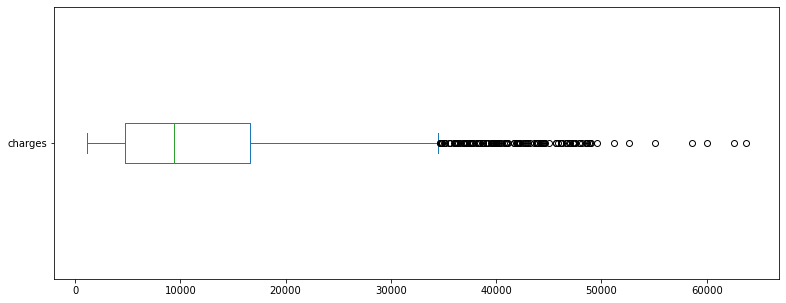

In [107]:
us_med_insurance['charges'].plot(kind='box', vert=False, figsize=(13,5)) #box plot

Below is a density plot showing the distributin of our data, with the mean in red color and the median in green color. 

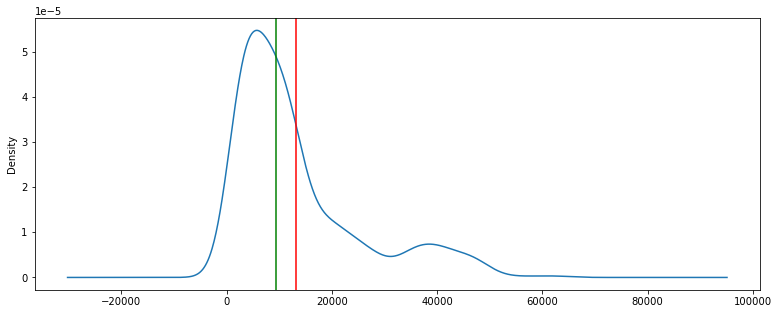

In [108]:
ax = us_med_insurance['charges'].plot(kind='density', figsize=(13,5)) # kde
ax.axvline(us_med_insurance['charges'].mean(), color='red')
ax.axvline(us_med_insurance['charges'].median(), color='green')

The histogram below shows the frequency distribution of our data. Along the Y-axis we can see how many patients has similar charges. 

Text(0.5, 0, 'Charges')

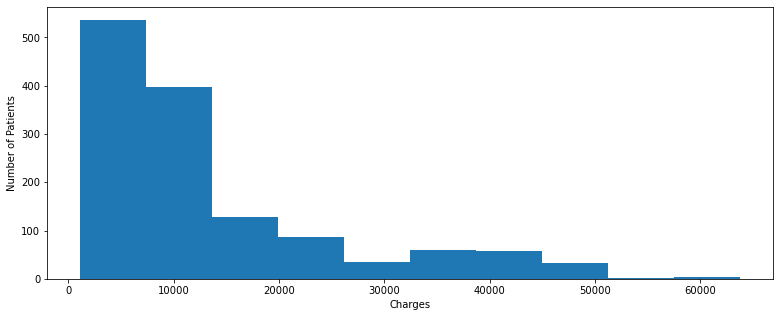

In [109]:
ax = us_med_insurance['charges'].plot(kind='hist', figsize=(13,5)) #histogram 
ax.set_ylabel('Number of Patients')
ax.set_xlabel('Charges')

The overview of the charges column show us that the lowest fee is 1122 \\$, the highest fee is 63,770 \\$, while the average charge is 13,270 \\$. We will be investigating further what other attributes affect the charges under 'Analysis of the relationship between the columns'. 

# Categorical Analysis and Visualisation

Below we will be reviewing the region and gender distribution in our data.

In [110]:
us_med_insurance['region'].value_counts() #checking the patients distribution from each region

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:ylabel='region'>

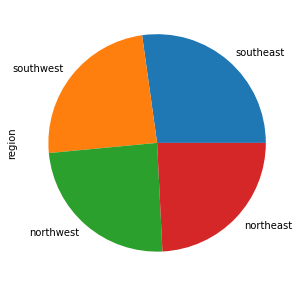

In [111]:
us_med_insurance['region'].value_counts().plot(kind='pie', figsize=(5,5)) #pie chart to visualize the patient distribution

In [112]:
us_med_insurance['sex'].value_counts() #checking the gender distribution

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

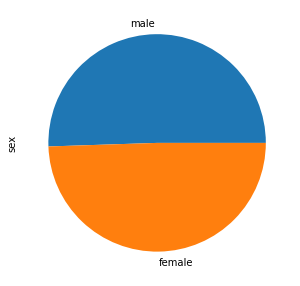

In [113]:
us_med_insurance['sex'].value_counts().plot(kind='pie', figsize=(5,5)) #visualizing data based on gender distribution

We can see that our data contains information about male and female patients equally. Their location is distributed evenly (within the USA), allowing us to conduct a more bias free analysis in overall. 

# Analysis of the relationship between the columns

In [114]:
us_med_insurance.smoker.value_counts() #reviewing the number of smokers in the patient group

no     1064
yes     274
Name: smoker, dtype: int64

In [115]:
average_charge_smoking = us_med_insurance.groupby('smoker').charges.mean() #reviewing charges based on smoking status

average_charge_smoking.reset_index()

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


Text(0.5, 0, 'Smoker')

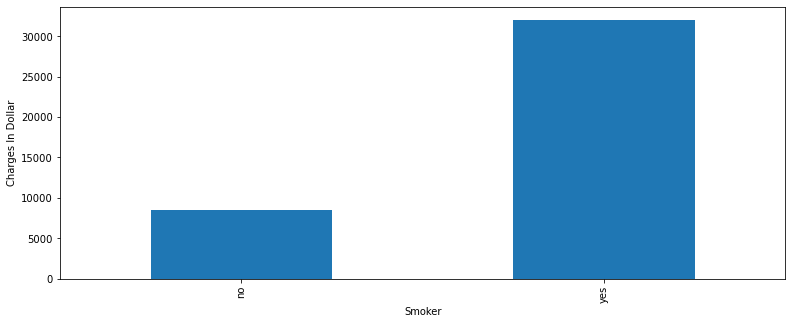

In [116]:
ax = average_charge_smoking.plot(kind='bar', figsize=(13,5)) #visualization of the charges based on smoking status of the patient
ax.set_ylabel('Charges In Dollar')
ax.set_xlabel('Smoker')

From the above analysis, it is very clear that the smoking status has a huge effect on how high the charges get for each patient. The average charge for a non smoker is around 8,434 \\$ as opposed to our smokers, whose average charge is 32,050 \\$!

Let's review below how the BMI ratings are affecting the cost and if it creates such a sharp distribution as the smoking status. 

<AxesSubplot:ylabel='rating_bmi'>

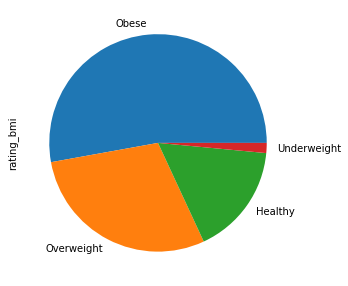

In [117]:
#creating a function to categorize patients based on their BMI score for better understanding
#BMI ranges as per www.nhs.uk 

def rating_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi >= 18.5 and bmi <= 24.9:
        return 'Healthy'
    elif bmi > 24.9 and bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
    
us_med_insurance['rating_bmi'] = us_med_insurance['bmi'].apply(rating_bmi) #creating a new column by applying the func on bmi col

us_med_insurance['rating_bmi'].value_counts().plot(kind='pie', figsize=(5,5)) #visualization of the bmi data


In [118]:
#organizing the rating_bmi column into ordered categorical values for better represantion later

us_med_insurance['rating_bmi'] = pd.Categorical(us_med_insurance['rating_bmi'], ['Underweight', 'Healthy', 'Overweight', 'Obese' ], ordered=True)

**After reviewing what the BMI measurements mean and having a general view on how they apply to our patient data, we can investigate further to see how it is affecting the insurance charges.**

,rating_bmi,charges
0,Underweight,8852.200585
1,Healthy,10379.499732
2,Overweight,11000.079337
3,Obese,15552.335469


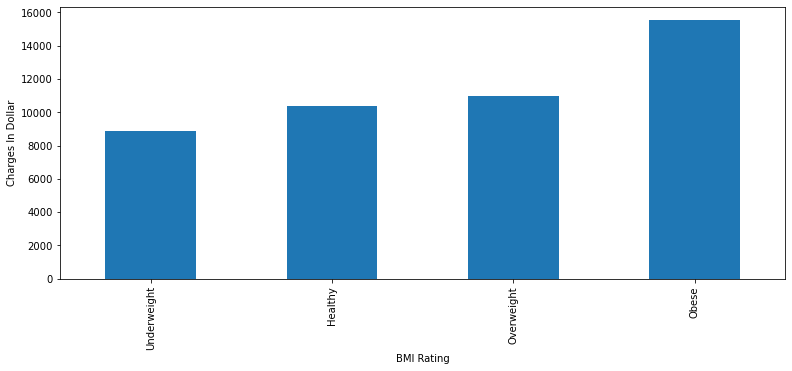

In [119]:
average_charge_bmi = us_med_insurance.groupby('rating_bmi').charges.mean() #checking the avg charges for the BMI ratings

ax = average_charge_bmi.plot(kind='bar', figsize=(13,5)) #visualisation of the data
ax.set_ylabel('Charges In Dollar')
ax.set_xlabel('BMI Rating')

average_charge_bmi.reset_index()

Based on the above analysis, we can say that the higher BMI rating increases the charges, however the impact is not as radical as with the smoking status. Between the charges for the 'Healthy' and 'Overweight' categories the differnce is minimal. It also seems like, that belonging to the 'Underweight' or 'Obese' categories, charges can be reduced or increased more significantly. 

**Let's have a look on how the number of children each patient has affect the insurance charges.**

In [120]:
us_med_insurance['children'].value_counts(normalize = True) #reviewing how many children patients have in our dataframe with % output

0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: children, dtype: float64

<AxesSubplot:ylabel='children'>

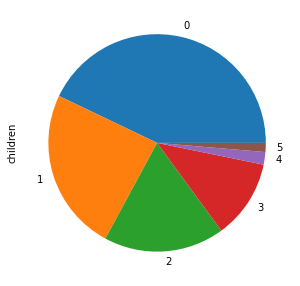

In [121]:
us_med_insurance['children'].value_counts().plot(kind='pie', figsize=(5,5)) #visualization to see how many children patients have in general

Upon reviewing the basic statistics of the children column, we can see that 67% of the patiens in the dataframe have no children or only 1 child. Only 3% of the patients have more than 3 children. 

In [122]:
average_charge_children = us_med_insurance.groupby('children').charges.mean() #checking the average charges based on the num of children
average_charge_children

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

Text(0.5, 0, 'Number of Children')

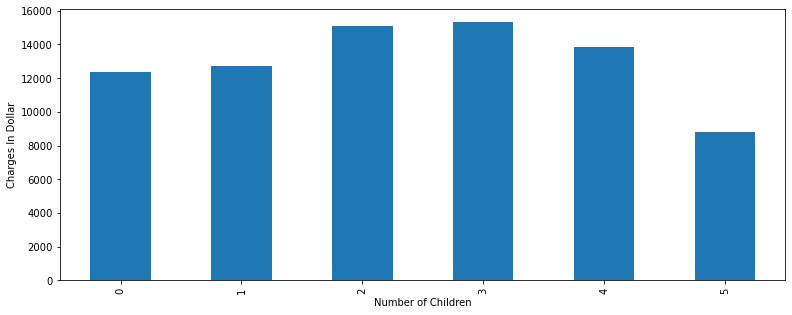

In [123]:
ax = average_charge_children.plot(kind='bar', figsize=(13,5))
ax.set_ylabel('Charges In Dollar')
ax.set_xlabel('Number of Children')

Upon reviewing the average charges based on the number of children the patients have, we can see that there is no positive correlation between the number of children and the charges. Moreover, we see that the lowest average charges show up in the category, where patients have 5 children. 

# Conclusion

During this brief analysis we have reviewed insurance charges for patients from the USA with equal representation accross the country. 

Before any final conlusion is drawn, further investigations should be conducted into the different categories. However, from the above summary so far, it can be deducted that the biggest impact on a patient's insurance charge depends on their smoking status, while the BMI measurement can further affect the total outcome. Having more or less children does not seem to have a direct impact on the fees set by the insurance provider.